# Powerplant Optimization with Differential Evolution

All information is taken from "Differential Evolution: A Survey of the State-of-the-Art"by Swagatam Das, Member, IEEE, and Ponnuthurai Nagaratnam Suganthan, Senior Member, IEEE.

In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

We aim to optimize two parameters: the scaling factor (mutation) and the crossover probability. Moreover, we consider different instantiations.

Note that we consider the scaling factor $\in [0.4, 1]$. The reason for that is that finding an optimal solutions is difficult for a scaling factor greater than $1$ since we have "big steps". For a scaling factor smaller than $0.4$ these steps are considerably small and therefore increase the run time drastically .

## 1. Initialization 

Randomly initiated population of real-valued parameter vectors. Each vector, called chromosome, forms a candidate solution to the multidimensional optimization problem.

In [2]:
def initialize(population_size_NP):
    # TODO: randomly initialize a population of NP individuals within the domain
    population = []
    random_chromosome = []
    for i in range(population_size_NP):
        random_chromosome = []
        # initialize energy produced:
        random_chromosome.append(random.uniform(0,5000000))
        random_chromosome.append(random.uniform(0,30000000))
        random_chromosome.append(random.uniform(0,12000000))
        
        # initialize demands
        random_chromosome.append(random.uniform(0,2000000))
        random_chromosome.append(random.uniform(0,30000000))
        random_chromosome.append(random.uniform(0,20000000))
        
        # initialize prices
        random_chromosome.append(random.uniform(0,0.45))
        random_chromosome.append(random.uniform(0,0.25))
        random_chromosome.append(random.uniform(0,0.2))
        
        population.append(random_chromosome)
    
    return population

In [4]:
def initiaize(population_size_NP):
    
    population = np.empty((0,9),dtype=float)
    
    for x in range(population_size_NP):
        
        result = [# initialize energy produced:
                np.random.uniform(0,5000000),np.random.uniform(0,30000000),np.random.uniform(0,12000000),
                # initialize energy demands:
                 np.random.uniform(0,2000000),np.random.uniform(0,30000000),np.random.uniform(0,20000000),
                # initialize energy prices:
                 np.random.uniform(0,0.45),np.random.uniform(0,0.25),np.random.uniform(0,0.2)]
        
        population = np.append(population, [result], axis=0)

    return population

initiaize(2)

array([[3.19093502e+06, 2.15938058e+07, 3.04925248e+06, 1.47983165e+06,
        4.46847916e+06, 9.57162760e+06, 3.12063591e-01, 1.47692313e-01,
        1.96909097e-01],
       [4.67216605e+06, 5.36126783e+06, 1.03506678e+07, 1.40677342e+06,
        2.93083436e+07, 1.90943455e+07, 1.92541876e-01, 2.04295469e-01,
        1.76661469e-01]])

In [3]:
print(initialize(3))

[[3004955.7764374637, 20293353.656187594, 9181171.028227225, 1794931.0517051884, 5775114.601534752, 17953821.974611226, 0.41612518789212266, 0.18906580441901524, 0.18748614881117998], [1182077.3388099214, 17456233.77737508, 11145845.800144633, 105055.12094460246, 6594618.302382267, 4178730.395859589, 0.05824006884252453, 0.1931346310971613, 0.1194632273833918], [3214450.899052842, 18234668.024939653, 8073548.547011204, 44998.988609866065, 4285544.551276132, 17799666.75951831, 0.1618452583639619, 0.13337723534842394, 0.19468106793993153]]


## 2. Mutation

In [4]:
def mutate(target_vector_X,scale_factor_F,population):
    #target_vector_X,scale_factor_F,population_size_NP,population
    # TODO: Generate a donor vector according to the mutation scheme with scale Factor F
    
    # NOT FINISHED !!!
    population_size_NP = len(population)
    param_vectors = []
    vectors_used = 0
    while vectors_used < 3:
        rand = random.randint(0, population_size_NP-1)
        new_vector = population[rand]
        
        # check if new_vector is not the target_vector_X and not already chosen for param_vectors
        # (new_vector!=param_vectors).all() or this one //// if-statement not working
        #if np.all((new_vector != target_vector_X)) and (np.array_equiv(new_vector, param_vectors)):
        if not np.array_equiv(new_vector,target_vector_X):
            if vectors_used == 0:
                param_vectors.append(new_vector)
                vectors_used += 1
            else:
                for i in range(vectors_used):
                    if not np.array_equiv(new_vector, param_vectors[i]):
                        param_vectors.append(new_vector)
                        vectors_used += 1
                        break

    donor_vector_V = param_vectors[0] + scale_factor_F*(param_vectors[1]-param_vectors[2])
    
    return donor_vector_V

In [5]:
target_vector_X = [50,40,30,20]
scale_factor_F = 0.5
population = np.array([[10,20,30,40], [30,40,50,60], [10,10,20,20], [30,30,30,30], [90,30,10,10], [20,20,30,40], [50,50,50,0], [40,40,30,30], [90,80,40,10], [40,40,70,80]])
    
print(mutate(target_vector_X,scale_factor_F,population))

[ 20.  20.  30.  40.]


## 3. Crossover / Recombination

In [6]:
def crossover(target_vector_X,donor_vector_V,cross_over_rate_Cr):
    # TODO: Generate a trial vector through binomial crossover
    trial_vector_U = np.copy(target_vector_X)
    D = len(target_vector_X)
    for j in range(D):
        j_rand = random.randint(1,D)
        if (random.random() <= cross_over_rate_Cr) or j == j_rand :
            trial_vector_U[j] = donor_vector_V[j]
            #print("donor_vector ",j)
        else:
            trial_vector_U[j] = target_vector_X[j]
            #print("target__vector ",j)
    return trial_vector_U

In [7]:
target_vector_X = [1,1,1,1,1,1,1,1,1]
donor_vector_V = [2,2,2,2,2,2,2,2,2]
cross_over_rate_Cr = 0.5
print(crossover(target_vector_X,donor_vector_V,cross_over_rate_Cr))

[1 2 2 2 1 1 2 1 2]


## 4. Selection

In [8]:
def demand(price, maxPrice, maxDemand):
    if(price > maxPrice):
        return 0
    
    if(price <= 0):
        return maxDemand
    
    demand = maxDemand - price**2 * maxDemand / maxPrice**2
    
    return demand

In [9]:
def cost(x, kwhPerPlant, costPerPlant, maxPlants):
    if(x <= 0):
        return 0
    
    if(x > kwhPerPlant * maxPlants):
        assert "Error: more planned than produceable"
    
    plantsNeeded = math.ceil(x / kwhPerPlant)
    
    return plantsNeeded * costPerPlant

In [10]:
def objective(tested_vector):
    
    # each e already provides the sum of energy produced per plant type
    total_energy_produced = tested_vector[0] + tested_vector[1] + tested_vector[2]
    
    total_energy_planned =  tested_vector[3] + tested_vector[4] + tested_vector[5]
    
    purchasing_cost = max((total_energy_planned-total_energy_produced),0)*0.6
    
    production_cost = cost(tested_vector[0], 50000, 10000, 100) + cost(tested_vector[1], 600000, 80000, 50) + cost(tested_vector[2], 4000000, 400000, 3)
    
    total_cost = purchasing_cost + production_cost
    
    revenue = min(demand(tested_vector[6], 0.45, 2000000), tested_vector[3])*tested_vector[6] + min(demand(tested_vector[7], 0.25, 30000000), tested_vector[4])*tested_vector[7] + min(demand(tested_vector[8], 0.2, 20000000), tested_vector[5])*tested_vector[8]
    
    #profit equals fitness
    profit = revenue - total_cost
    
    return profit

In [11]:
def select(target_vector_X,trial_vector_U):
    # TODO: Evaluate the trial vector and choose new target vector with better value

    if objective(target_vector_X) > objective(trial_vector_U):
        new_target_vector = target_vector_X
    else:
        new_target_vector = trial_vector_U

    return new_target_vector

## 5. Action

In [12]:
def get_best(new_population,population_size_NP):
    #choose the best one of the final population
    best_chromosome = new_population[0]
    for i in range(population_size_NP):
        if objective(new_population[i])>objective(best_chromosome):
            best_chromosome = new_population[i]

    return best_chromosome

In [13]:
# set factors:
scale_factor_F = 0.4
cross_over_rate_Cr = 0.5
population_size_NP = 10

# Initialization:
generation_number_G = 0
new_population = initialize(population_size_NP)
best_solution_list = []

converged = False
while not converged:
    population = np.copy(new_population)
    for i in range(population_size_NP):
        target_vector_X = population[i]
        
        # Mutation:
        donor_vector_V = mutate(target_vector_X,scale_factor_F,population)
        
        # Crossover:
        trial_vector_U = crossover(target_vector_X,donor_vector_V,cross_over_rate_Cr)
        
        # Selection:
        new_population[i] = select(target_vector_X,trial_vector_U)
    
    generation_number_G += 1
    converged = (generation_number_G == 100)
    #choose the best one of the final population
    best_chromosome = get_best(new_population,population_size_NP)
    best_solution_list.append(objective(best_chromosome))
    
print("done!")
print("best Chromosome:")
print(best_chromosome)
print(objective(best_chromosome))
    

done!
best Chromosome:
[  7.89324663e+05   9.49125152e+06   7.56600782e+06   1.13125226e+06
   1.58467787e+07   8.99697832e+05   2.95733316e-01   1.67012451e-01
   1.78066190e-01]
882677.21772


## 6. Plot

In [22]:
def simple_plot(best_profit_per_run,minimum_solution,best_solution):
    fig, ax = plt.subplots(figsize=plt.figaspect(0.2))
    ax.plot(best_profit_per_run, ':r', label=f"parameters")
    ax.set(ylim=[minimum_solution,best_solution],ylabel='Profit', xlabel='Run', title='DE on Power Plant Optimization')
    ax.legend()
    plt.show()
    fig.savefig(f"plots/test.png")

Best solution in this run:  882677.21772


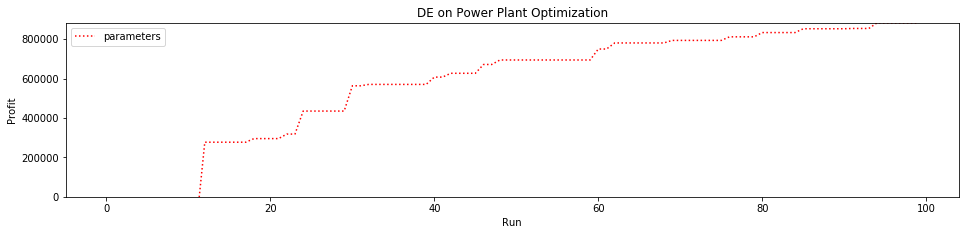

In [23]:
best_profit_per_run = best_solution_list
best_solution = max(best_solution_list)

print("Best solution in this run: ",best_solution)
simple_plot(best_profit_per_run,0,best_solution)